## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  60.864587  1646.981272  0.243140  5.251559  1.405459
1  11.211406   989.009735  0.229533  4.474071  1.589730
2  73.635089   655.713619  0.822606  3.713840  1.431870
3  65.173773  1325.052917  0.684667  6.950347  1.416228
4  66.186566  1099.705047  0.798755  7.730873  1.381087


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.9996  | train_mse: 10.94916| train_mae: 2.56937 |  0:00:00s
epoch 1  | loss: 0.72449 | train_mse: 8.02344 | train_mae: 2.26668 |  0:00:00s
epoch 2  | loss: 0.38515 | train_mse: 5.82143 | train_mae: 1.84483 |  0:00:00s


epoch 3  | loss: 0.49834 | train_mse: 5.02406 | train_mae: 1.68982 |  0:00:00s
epoch 4  | loss: 0.33002 | train_mse: 4.65987 | train_mae: 1.584   |  0:00:00s
epoch 5  | loss: 0.38814 | train_mse: 3.10591 | train_mae: 1.27647 |  0:00:00s


epoch 6  | loss: 0.2263  | train_mse: 2.57319 | train_mae: 1.16121 |  0:00:00s
epoch 7  | loss: 0.16078 | train_mse: 3.21733 | train_mae: 1.26706 |  0:00:00s
epoch 8  | loss: 0.26669 | train_mse: 3.68954 | train_mae: 1.30037 |  0:00:00s


epoch 9  | loss: 0.16259 | train_mse: 2.20027 | train_mae: 1.04379 |  0:00:00s
epoch 10 | loss: 0.20277 | train_mse: 1.0559  | train_mae: 0.76508 |  0:00:00s
epoch 11 | loss: 0.33148 | train_mse: 1.47466 | train_mae: 0.89776 |  0:00:00s


epoch 12 | loss: 0.19916 | train_mse: 2.0705  | train_mae: 1.02035 |  0:00:01s
epoch 13 | loss: 0.24688 | train_mse: 2.60885 | train_mae: 1.08981 |  0:00:01s
epoch 14 | loss: 0.15843 | train_mse: 2.14534 | train_mae: 0.99212 |  0:00:01s
epoch 15 | loss: 0.19507 | train_mse: 1.15881 | train_mae: 0.75529 |  0:00:01s


epoch 16 | loss: 0.16735 | train_mse: 1.38757 | train_mae: 0.8086  |  0:00:01s
epoch 17 | loss: 0.16517 | train_mse: 1.58481 | train_mae: 0.84768 |  0:00:01s
epoch 18 | loss: 0.17581 | train_mse: 1.43782 | train_mae: 0.80902 |  0:00:01s
epoch 19 | loss: 0.12798 | train_mse: 1.13033 | train_mae: 0.71546 |  0:00:01s


epoch 20 | loss: 0.1218  | train_mse: 0.78151 | train_mae: 0.6032  |  0:00:01s
epoch 21 | loss: 0.15901 | train_mse: 0.65563 | train_mae: 0.55767 |  0:00:01s
epoch 22 | loss: 0.16703 | train_mse: 0.59311 | train_mae: 0.54394 |  0:00:01s


epoch 23 | loss: 0.32358 | train_mse: 0.57499 | train_mae: 0.54766 |  0:00:01s
epoch 24 | loss: 0.1352  | train_mse: 0.25272 | train_mae: 0.37237 |  0:00:01s
epoch 25 | loss: 0.19704 | train_mse: 0.11327 | train_mae: 0.25107 |  0:00:01s


epoch 26 | loss: 0.16993 | train_mse: 0.1142  | train_mae: 0.24933 |  0:00:02s
epoch 27 | loss: 0.18603 | train_mse: 0.22275 | train_mae: 0.33675 |  0:00:02s
epoch 28 | loss: 0.22332 | train_mse: 0.28216 | train_mae: 0.36725 |  0:00:02s


epoch 29 | loss: 0.1664  | train_mse: 0.17676 | train_mae: 0.28199 |  0:00:02s
epoch 30 | loss: 0.21322 | train_mse: 0.15921 | train_mae: 0.29188 |  0:00:02s
epoch 31 | loss: 0.16508 | train_mse: 0.13768 | train_mae: 0.26614 |  0:00:02s
epoch 32 | loss: 0.1426  | train_mse: 0.17698 | train_mae: 0.29434 |  0:00:02s


epoch 33 | loss: 0.1189  | train_mse: 0.20945 | train_mae: 0.32315 |  0:00:02s
epoch 34 | loss: 0.15037 | train_mse: 0.12756 | train_mae: 0.26246 |  0:00:02s
epoch 35 | loss: 0.08931 | train_mse: 0.10782 | train_mae: 0.24315 |  0:00:02s


epoch 36 | loss: 0.32577 | train_mse: 0.11245 | train_mae: 0.25017 |  0:00:02s
epoch 37 | loss: 0.18111 | train_mse: 0.11983 | train_mae: 0.25499 |  0:00:02s
epoch 38 | loss: 0.11666 | train_mse: 0.18468 | train_mae: 0.3073  |  0:00:02s


epoch 39 | loss: 0.18903 | train_mse: 0.16551 | train_mae: 0.29917 |  0:00:02s
epoch 40 | loss: 0.24956 | train_mse: 0.10196 | train_mae: 0.24153 |  0:00:03s
epoch 41 | loss: 0.20757 | train_mse: 0.08241 | train_mae: 0.22136 |  0:00:03s


epoch 42 | loss: 0.11712 | train_mse: 0.08262 | train_mae: 0.22505 |  0:00:03s
epoch 43 | loss: 0.14763 | train_mse: 0.0874  | train_mae: 0.23216 |  0:00:03s
epoch 44 | loss: 0.12568 | train_mse: 0.08684 | train_mae: 0.22868 |  0:00:03s


epoch 45 | loss: 0.14042 | train_mse: 0.09192 | train_mae: 0.22499 |  0:00:03s
epoch 46 | loss: 0.11458 | train_mse: 0.10271 | train_mae: 0.24334 |  0:00:03s
epoch 47 | loss: 0.13091 | train_mse: 0.09663 | train_mae: 0.2383  |  0:00:03s


epoch 48 | loss: 0.10435 | train_mse: 0.10198 | train_mae: 0.2488  |  0:00:03s
epoch 49 | loss: 0.19365 | train_mse: 0.09681 | train_mae: 0.25675 |  0:00:03s
epoch 50 | loss: 0.1616  | train_mse: 0.08565 | train_mae: 0.2451  |  0:00:03s


epoch 51 | loss: 0.11704 | train_mse: 0.08549 | train_mae: 0.2338  |  0:00:03s
epoch 52 | loss: 0.15397 | train_mse: 0.09884 | train_mae: 0.2346  |  0:00:04s
epoch 53 | loss: 0.09619 | train_mse: 0.10013 | train_mae: 0.23633 |  0:00:04s


epoch 54 | loss: 0.09401 | train_mse: 0.07086 | train_mae: 0.20486 |  0:00:04s
epoch 55 | loss: 0.09964 | train_mse: 0.07433 | train_mae: 0.21315 |  0:00:04s
epoch 56 | loss: 0.17642 | train_mse: 0.09361 | train_mae: 0.23006 |  0:00:04s


epoch 57 | loss: 0.1128  | train_mse: 0.09777 | train_mae: 0.22971 |  0:00:04s
epoch 58 | loss: 0.20448 | train_mse: 0.08395 | train_mae: 0.20766 |  0:00:04s
epoch 59 | loss: 0.12024 | train_mse: 0.06386 | train_mae: 0.19212 |  0:00:04s
epoch 60 | loss: 0.09594 | train_mse: 0.04809 | train_mae: 0.17286 |  0:00:04s


epoch 61 | loss: 0.09465 | train_mse: 0.05652 | train_mae: 0.18776 |  0:00:04s
epoch 62 | loss: 0.09261 | train_mse: 0.0873  | train_mae: 0.22176 |  0:00:04s
epoch 63 | loss: 0.20952 | train_mse: 0.07028 | train_mae: 0.21009 |  0:00:04s


epoch 64 | loss: 0.13851 | train_mse: 0.07415 | train_mae: 0.21607 |  0:00:04s
epoch 65 | loss: 0.09296 | train_mse: 0.0698  | train_mae: 0.20304 |  0:00:05s
epoch 66 | loss: 0.08116 | train_mse: 0.06109 | train_mae: 0.18573 |  0:00:05s
epoch 67 | loss: 0.07831 | train_mse: 0.0665  | train_mae: 0.19229 |  0:00:05s


epoch 68 | loss: 0.09832 | train_mse: 0.08954 | train_mae: 0.21052 |  0:00:05s
epoch 69 | loss: 0.10898 | train_mse: 0.08958 | train_mae: 0.20639 |  0:00:05s
epoch 70 | loss: 0.13696 | train_mse: 0.09512 | train_mae: 0.21646 |  0:00:05s
epoch 71 | loss: 0.08027 | train_mse: 0.09051 | train_mae: 0.21549 |  0:00:05s


epoch 72 | loss: 0.0689  | train_mse: 0.0837  | train_mae: 0.21081 |  0:00:05s
epoch 73 | loss: 0.10059 | train_mse: 0.10977 | train_mae: 0.23376 |  0:00:05s
epoch 74 | loss: 0.08703 | train_mse: 0.07637 | train_mae: 0.19868 |  0:00:05s


epoch 75 | loss: 0.21173 | train_mse: 0.0628  | train_mae: 0.18067 |  0:00:05s
epoch 76 | loss: 0.16651 | train_mse: 0.06094 | train_mae: 0.18431 |  0:00:05s
epoch 77 | loss: 0.11486 | train_mse: 0.09737 | train_mae: 0.22605 |  0:00:05s


epoch 78 | loss: 0.12491 | train_mse: 0.0892  | train_mae: 0.21529 |  0:00:05s
epoch 79 | loss: 0.14755 | train_mse: 0.07072 | train_mae: 0.19097 |  0:00:05s
epoch 80 | loss: 0.08528 | train_mse: 0.07169 | train_mae: 0.19245 |  0:00:06s
epoch 81 | loss: 0.15504 | train_mse: 0.06597 | train_mae: 0.18984 |  0:00:06s


epoch 82 | loss: 0.11134 | train_mse: 0.06565 | train_mae: 0.18745 |  0:00:06s
epoch 83 | loss: 0.15081 | train_mse: 0.0631  | train_mae: 0.18697 |  0:00:06s
epoch 84 | loss: 0.3953  | train_mse: 0.08504 | train_mae: 0.21673 |  0:00:06s
epoch 85 | loss: 0.12477 | train_mse: 0.0653  | train_mae: 0.19617 |  0:00:06s


epoch 86 | loss: 0.13321 | train_mse: 0.10854 | train_mae: 0.23868 |  0:00:06s
epoch 87 | loss: 0.34923 | train_mse: 0.17295 | train_mae: 0.29133 |  0:00:06s
epoch 88 | loss: 0.16056 | train_mse: 0.13999 | train_mae: 0.26865 |  0:00:06s
epoch 89 | loss: 0.12146 | train_mse: 0.09395 | train_mae: 0.22183 |  0:00:06s


epoch 90 | loss: 0.14159 | train_mse: 0.07347 | train_mae: 0.2107  |  0:00:06s
epoch 91 | loss: 0.10559 | train_mse: 0.06812 | train_mae: 0.20741 |  0:00:06s
epoch 92 | loss: 0.09987 | train_mse: 0.06829 | train_mae: 0.20143 |  0:00:06s


epoch 93 | loss: 0.10723 | train_mse: 0.06111 | train_mae: 0.17955 |  0:00:06s
epoch 94 | loss: 0.13393 | train_mse: 0.08326 | train_mae: 0.20505 |  0:00:06s
epoch 95 | loss: 0.18409 | train_mse: 0.0732  | train_mae: 0.19069 |  0:00:07s


epoch 96 | loss: 0.16743 | train_mse: 0.0618  | train_mae: 0.17749 |  0:00:07s
epoch 97 | loss: 0.19833 | train_mse: 0.095   | train_mae: 0.21323 |  0:00:07s
epoch 98 | loss: 0.19544 | train_mse: 0.07972 | train_mae: 0.20164 |  0:00:07s
epoch 99 | loss: 0.11546 | train_mse: 0.07311 | train_mae: 0.19358 |  0:00:07s


epoch 100| loss: 0.17837 | train_mse: 0.1908  | train_mae: 0.28876 |  0:00:07s
epoch 101| loss: 0.07662 | train_mse: 0.16586 | train_mae: 0.27137 |  0:00:07s
epoch 102| loss: 0.1711  | train_mse: 0.11111 | train_mae: 0.23768 |  0:00:07s
epoch 103| loss: 0.09344 | train_mse: 0.13153 | train_mae: 0.25205 |  0:00:07s


epoch 104| loss: 0.1281  | train_mse: 0.20159 | train_mae: 0.30166 |  0:00:07s
epoch 105| loss: 0.11496 | train_mse: 0.24345 | train_mae: 0.32597 |  0:00:07s
epoch 106| loss: 0.11035 | train_mse: 0.16565 | train_mae: 0.27246 |  0:00:07s


epoch 107| loss: 0.09736 | train_mse: 0.15637 | train_mae: 0.26532 |  0:00:07s
epoch 108| loss: 0.17263 | train_mse: 0.10269 | train_mae: 0.22272 |  0:00:07s
epoch 109| loss: 0.20301 | train_mse: 0.08393 | train_mae: 0.20773 |  0:00:07s
epoch 110| loss: 0.18279 | train_mse: 0.09133 | train_mae: 0.22125 |  0:00:08s

Early stopping occurred at epoch 110 with best_epoch = 60 and best_train_mae = 0.17286
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

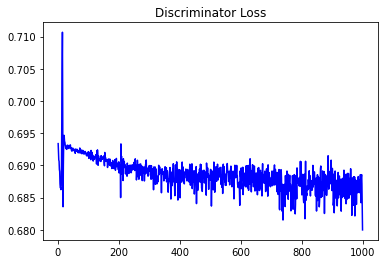

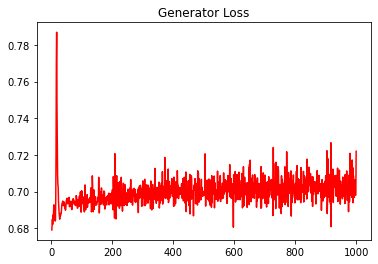

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15803154285533869


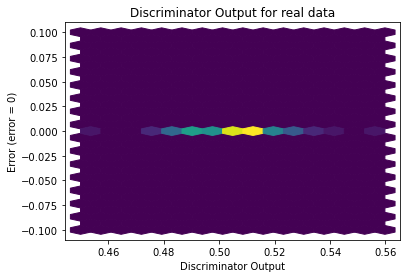

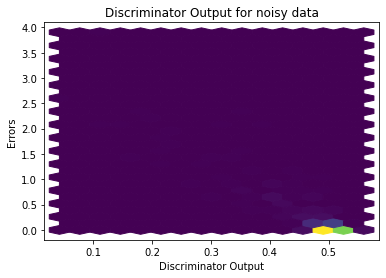

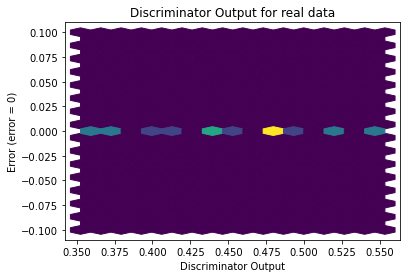

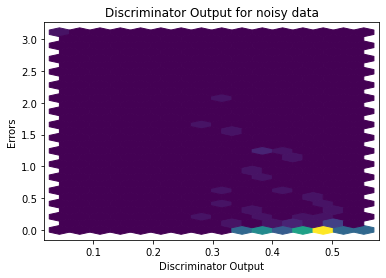

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


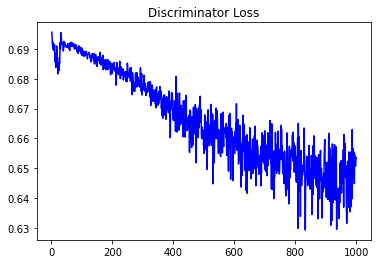

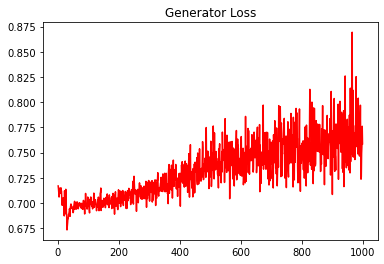

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17412892196668775


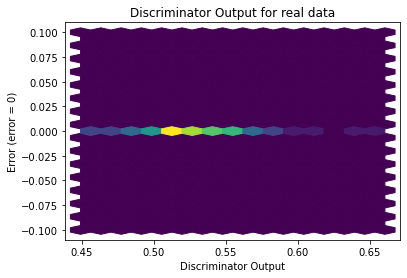

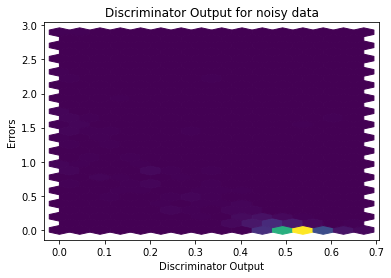

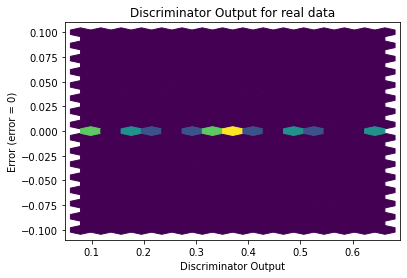

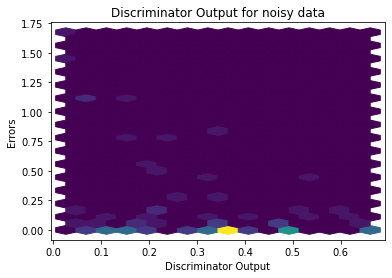

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1957]], requires_grad=True)
